In [9]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtesting import Backtest

from src.strategies import VolumeSpike
from src import plotting
from src.crypto_data import BinanceDataManager

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [2]:
symbol = "APTUSDT"
df = BinanceDataManager.data_to_df(f"/Users/ivankyulev/Projects/Notebooks/data/futures/um/monthly/klines/{symbol}/1h/")

In [3]:
# Here we add 3x 7day Moving Average of Volume
df["Vol_4x_7ma"] = df["Volume"].rolling(7).mean() * 4

In [4]:
df

,Open,High,Low,Close,Volume,Quote Volume,Count,Taker Buy Volume,Taker Buy Quote Volume,Vol_4x_7ma
Date,,,,,,,,,,
2022-10-18 22:00:00-04:00,8.00,8.60,6.59,7.21,"41,069,434.20","292,724,452.68",488653,"21,494,997.60","153,222,673.04",NaN
2022-10-18 23:00:00-04:00,7.21,7.38,6.56,6.75,"25,441,882.00","175,533,910.44",323516,"12,607,348.40","87,077,107.68",NaN
2022-10-19 00:00:00-04:00,6.75,7.30,6.68,7.05,"20,648,445.90","145,708,138.61",280535,"10,978,684.00","77,453,297.58",NaN
2022-10-19 01:00:00-04:00,7.05,8.08,7.05,7.76,"32,510,654.10","249,496,856.25",462184,"17,009,827.20","130,550,225.31",NaN
2022-10-19 02:00:00-04:00,7.76,7.87,7.53,7.75,"13,492,514.90","104,111,002.74",250931,"6,726,836.50","51,939,110.89",NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-30 15:00:00-04:00,7.88,7.91,7.84,7.88,"326,916.60","2,575,148.51",19003,"163,136.00","1,285,010.75","2,712,029.31"
2024-09-30 16:00:00-04:00,7.88,7.94,7.87,7.92,"359,386.10","2,841,582.66",18334,"193,444.10","1,529,486.23","2,557,473.26"
2024-09-30 17:00:00-04:00,7.92,7.95,7.89,7.90,"231,225.90","1,830,975.80",12283,"132,266.90","1,047,583.60","2,172,917.37"


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Quote Volume,Count,Taker Buy Volume,Taker Buy Quote Volume,Vol_4x_7ma
count,"17,110.00","17,110.00","17,110.00","17,110.00","17,110.00","17,110.00","17,110.00","17,110.00","17,110.00","17,104.00"
mean,8.37,8.44,8.30,8.37,"1,445,703.19","13,462,573.00","29,646.91","710,880.19","6,613,923.62","5,764,378.81"
std,3.04,3.08,3.00,3.04,"2,575,592.18","28,397,642.48","42,491.42","1,292,409.72","14,177,842.89","8,672,243.66"
min,3.11,3.17,3.06,3.11,"56,442.90","288,743.07","1,273.00","19,641.50","108,234.09","405,703.60"
25%,6.25,6.29,6.21,6.25,"385,618.30","2,744,544.46","9,618.25","188,981.15","1,353,482.37","1,860,979.94"
50%,7.79,7.86,7.70,7.79,"698,520.15","5,380,675.33","16,604.50","341,210.75","2,631,706.68","3,131,534.31"
75%,9.55,9.63,9.46,9.55,"1,408,944.10","12,022,045.84","31,893.00","686,840.45","5,853,261.43","5,811,185.83"
max,19.87,20.44,18.87,19.87,"47,727,149.80","819,607,842.30","910,233.00","25,140,686.60","384,349,877.13","99,989,825.09"


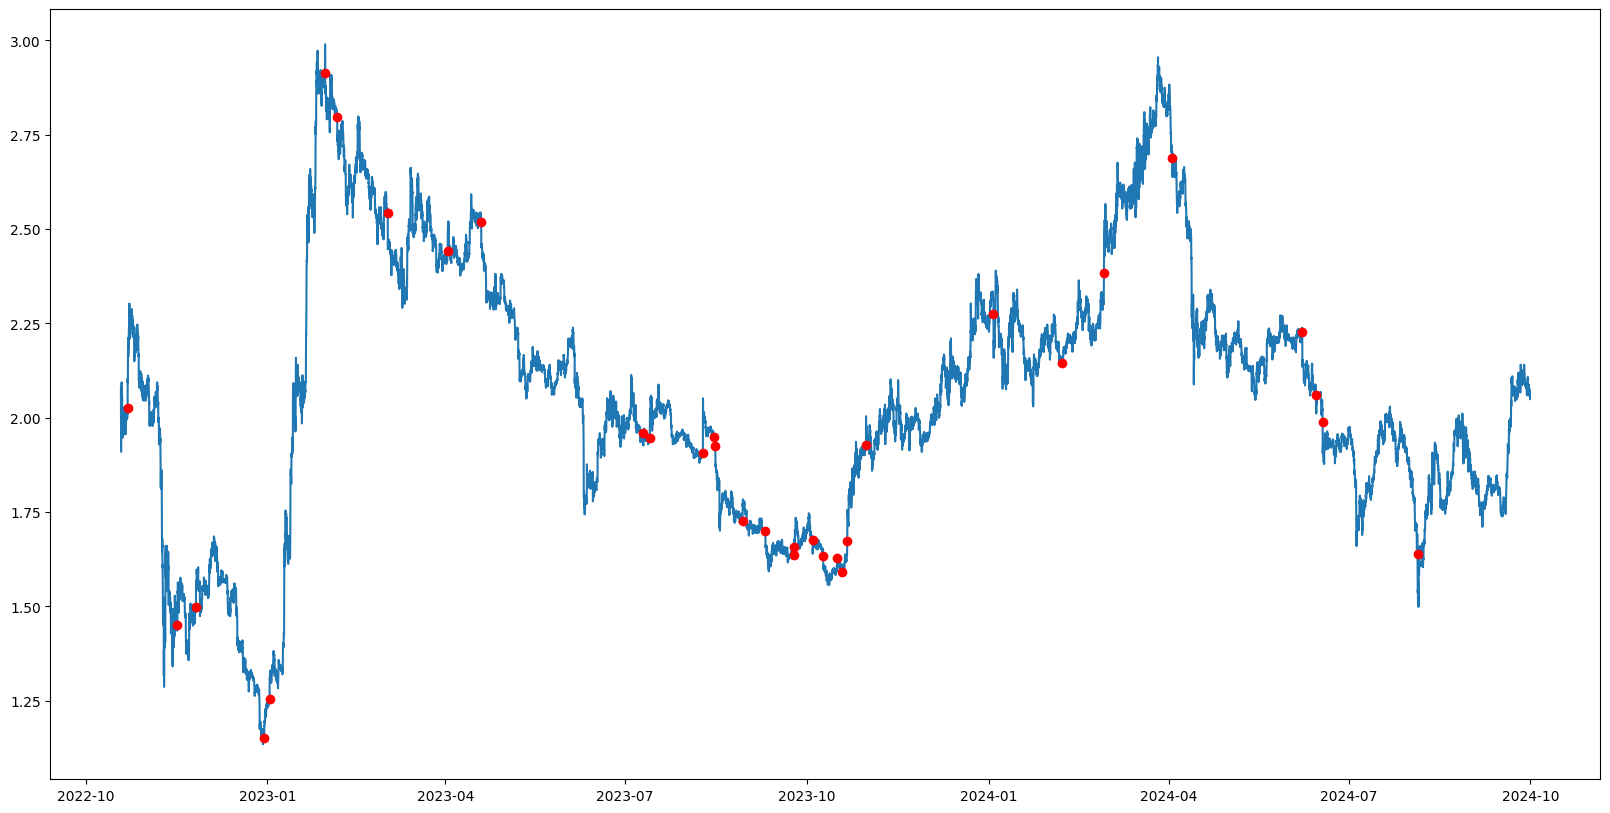

In [12]:
df_buy_signal = df[df["Volume"] > df["Vol_4x_7ma"]]
plt.figure(figsize=(20, 10))
plt.plot(df.index, np.log(df["Open"]))
plt.plot(
    df_buy_signal.index,
    np.log(df_buy_signal["Open"]),
    marker="o",
    linestyle="None",
    color="red",
)

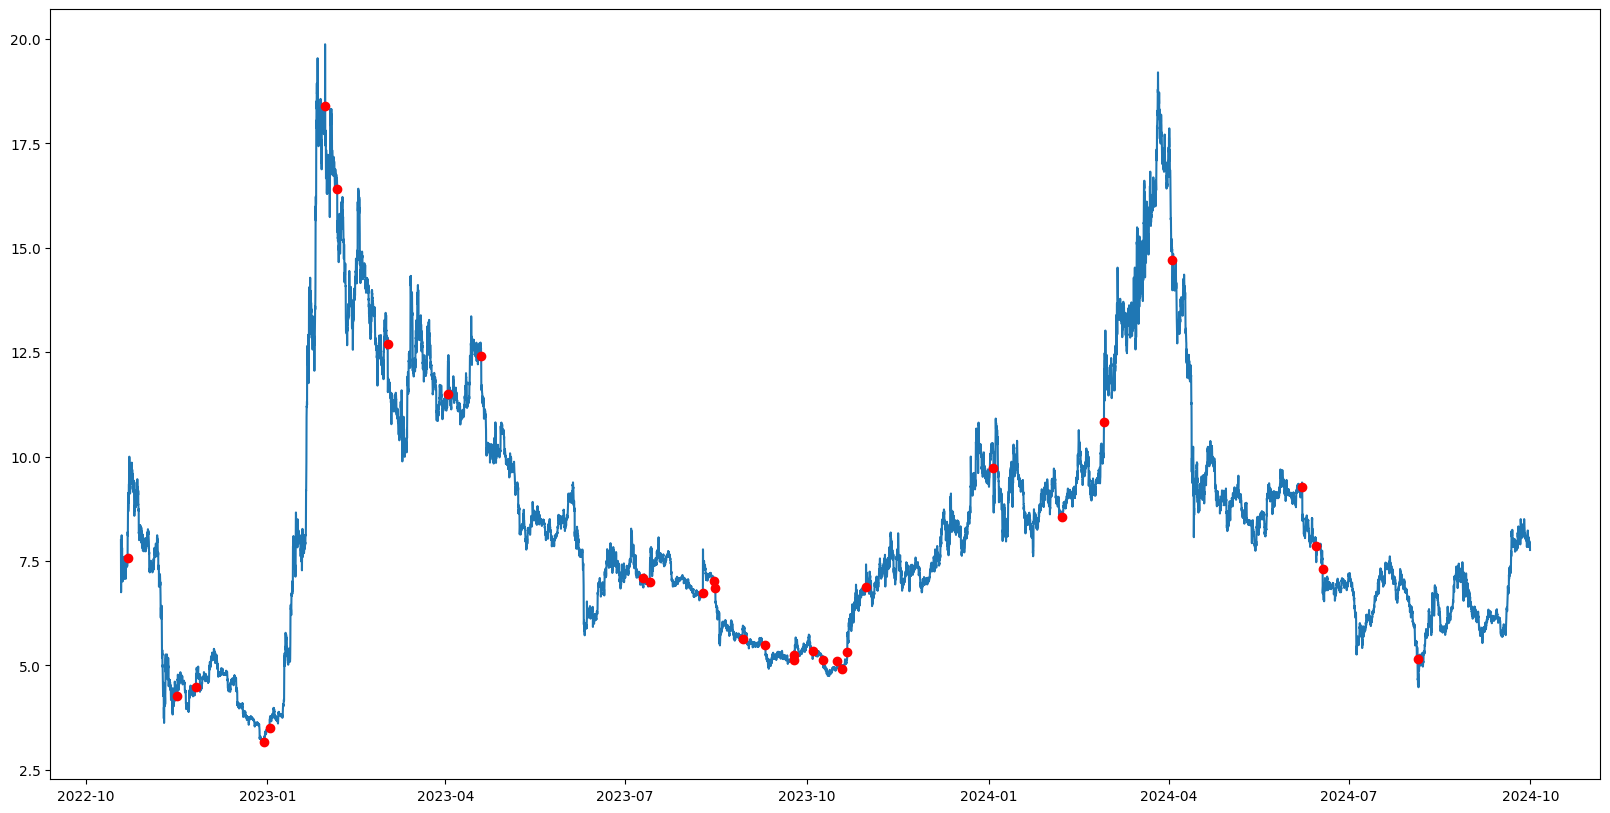

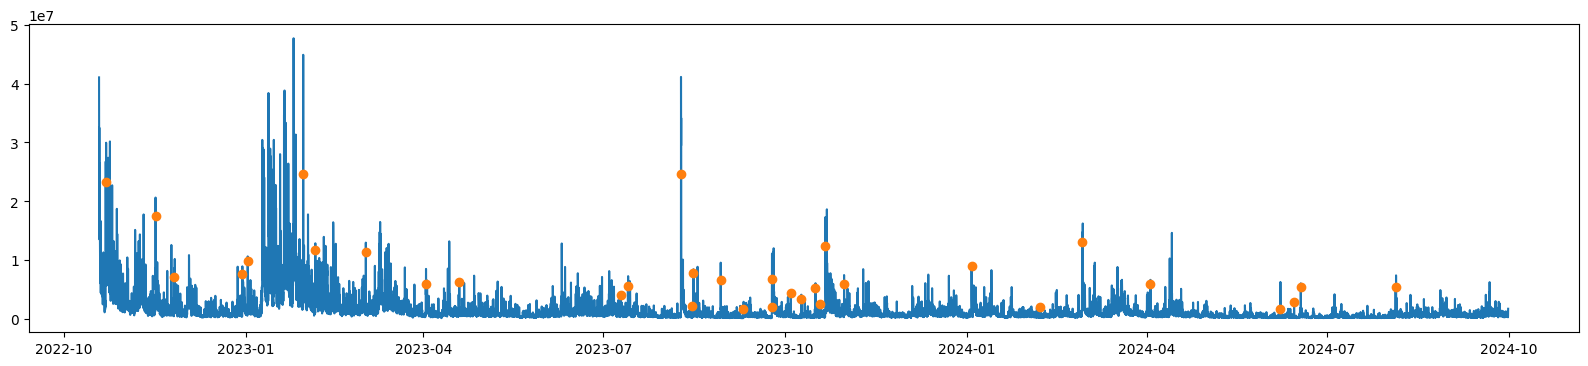

In [13]:
df_buy_signal = df[df["Volume"] > df["Vol_4x_7ma"]]
plt.figure(figsize=(20, 10))
plt.plot(df.index, df["Open"])
plt.plot(
    df_buy_signal.index,
    df_buy_signal["Open"],
    marker="o",
    linestyle="None",
    color="red",
)

plt.figure(figsize=(20, 4))
plt.plot(df.index, df["Volume"])
plt.plot(df_buy_signal.index, df_buy_signal["Vol_4x_7ma"], marker="o", linestyle="None")

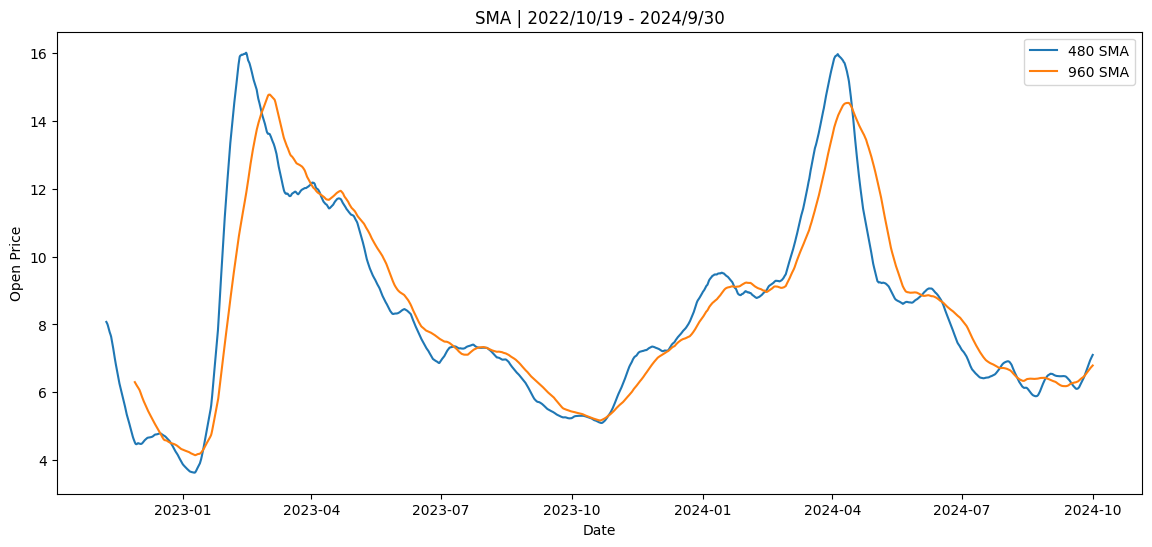

<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [21]:
plotting.plot_sma(df, smas=[24 * 20, 24 * 40], hide_data=True, y_axis="Open")

,Open,High,Low,Close,Volume,Quote Volume,Count,Taker Buy Volume,Taker Buy Quote Volume,Vol_4x_7ma
Date,,,,,,,,,,
2022-10-22 07:00:00-04:00,7.57,8.55,7.56,8.20,"26,744,556.50","214,279,072.71",323524,"14,426,329.30","115,410,892.02","23,246,043.83"
2022-11-16 11:00:00-05:00,4.27,4.78,4.26,4.66,"20,609,225.40","95,663,906.67",256801,"10,788,962.30","50,068,693.49","17,526,524.57"
2022-11-25 20:00:00-05:00,4.48,4.84,4.48,4.77,"8,557,799.10","40,364,518.56",104984,"4,543,877.50","21,405,815.52","7,027,327.31"
2022-12-30 09:00:00-05:00,3.16,3.32,3.15,3.27,"8,897,414.70","29,086,788.94",67218,"4,681,905.00","15,299,423.06","7,588,741.71"
2023-01-02 02:00:00-05:00,3.51,3.90,3.50,3.70,"10,589,850.60","39,175,329.77",81701,"5,861,748.00","21,654,976.58","9,889,873.60"
2023-01-30 03:00:00-05:00,18.41,20.14,18.41,19.87,"24,680,223.90","479,538,845.04",547868,"12,928,437.90","251,106,850.04","24,576,314.63"
2023-02-05 07:00:00-05:00,16.40,16.47,14.61,15.38,"12,825,531.00","201,915,251.00",232870,"5,009,306.50","79,038,876.82","11,607,665.37"
2023-03-02 20:00:00-05:00,12.70,12.72,11.19,11.56,"12,936,085.50","153,776,549.11",202314,"5,595,026.80","66,346,466.59","11,419,022.17"
2023-04-02 05:00:00-04:00,11.49,12.04,11.49,11.97,"6,522,530.00","77,247,080.01",122201,"3,483,307.30","41,231,964.59","5,969,174.29"


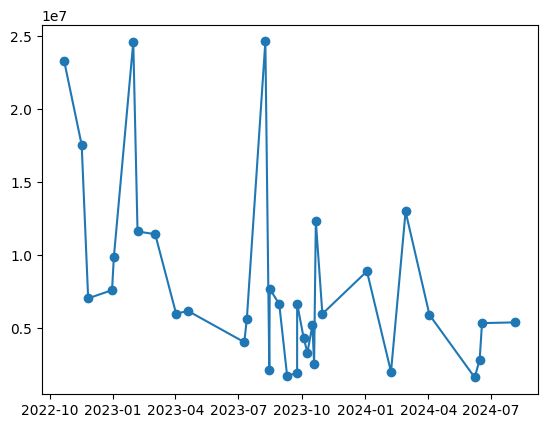

In [8]:
df_filtered = df[df["Volume"] > df["Vol_4x_7ma"]]
plt.plot(df_filtered.index, df_filtered["Vol_4x_7ma"], marker="o", label="Data Points")
df_filtered